In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
from rdkit import Chem
from e3fp.fingerprint.generate import fp, fprints_dict_from_mol
from e3fp.conformer.generate import generate_conformers
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
IPythonConsole.ipython_useSVG=True

In [49]:
mols = [ mol for mol in Chem.SDMolSupplier( "cdk2.sdf", removeHs=False ) ]

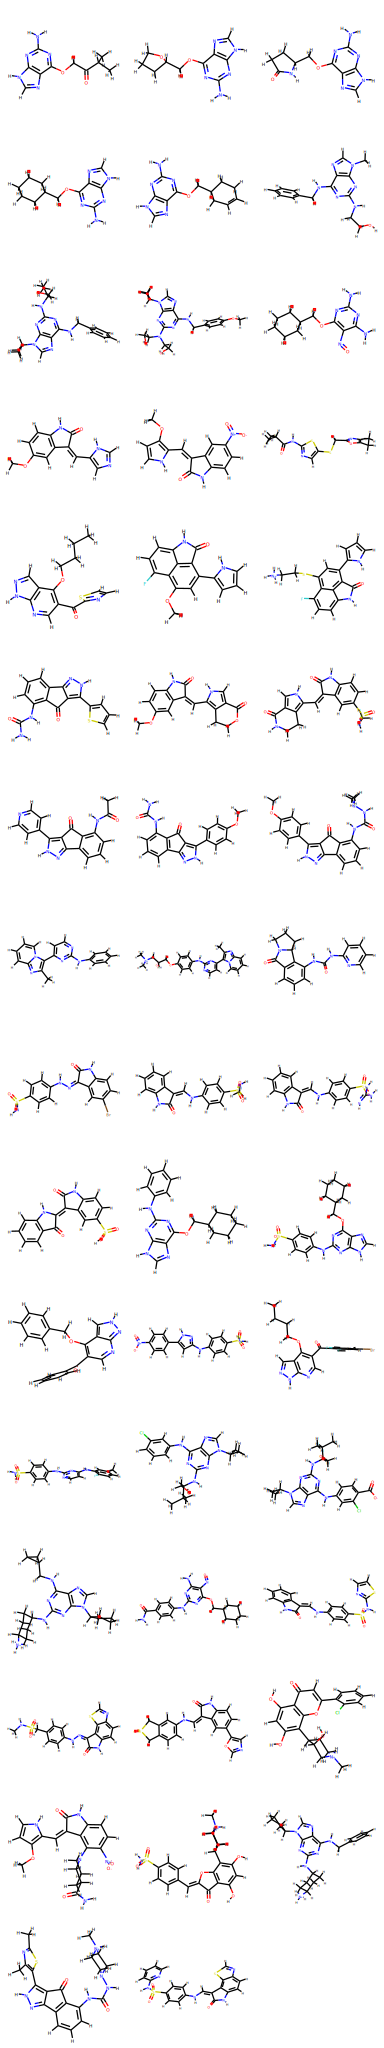

In [50]:
Draw.MolsToGridImage( mols )

In [51]:
fpdicts = [ fprints_dict_from_mol( mol ) for mol in mols ]

2017-08-11 09:03:14,625|INFO|Generating fingerprints for ZINC03814457.
2017-08-11 09:03:14,695|INFO|Generated 1 fingerprints for ZINC03814457.
2017-08-11 09:03:14,696|INFO|Generating fingerprints for ZINC03814459.
2017-08-11 09:03:14,766|INFO|Generated 1 fingerprints for ZINC03814459.
2017-08-11 09:03:14,767|INFO|Generating fingerprints for ZINC03814460.
2017-08-11 09:03:14,839|INFO|Generated 1 fingerprints for ZINC03814460.
2017-08-11 09:03:14,840|INFO|Generating fingerprints for ZINC00023543.
2017-08-11 09:03:14,912|INFO|Generated 1 fingerprints for ZINC00023543.
2017-08-11 09:03:14,913|INFO|Generating fingerprints for ZINC03814458.
2017-08-11 09:03:14,984|INFO|Generated 1 fingerprints for ZINC03814458.
2017-08-11 09:03:14,985|INFO|Generating fingerprints for ZINC01641925.
2017-08-11 09:03:15,129|INFO|Generated 1 fingerprints for ZINC01641925.
2017-08-11 09:03:15,130|INFO|Generating fingerprints for ZINC01649340.
2017-08-11 09:03:15,235|INFO|Generated 1 fingerprints for ZINC01649340.

In [52]:
# get e3fp fingerprint
fps = [ fp[5][0] for fp in fpdicts]

In [53]:
# convert to rdkit fp from e3fp fingerprint
binfp = [ fp.fold().to_rdkit() for fp in fps ]
# getmorganfp
morganfp = [ AllChem.GetMorganFingerprintAsBitVect(mol,2) for mol in mols ]

In [54]:
# calculate pair wise TC
df = {"MOLI":[], "MOLJ":[], "E3FPTC":[], "MORGANTC":[],"pairidx":[]}
for i in range( len(binfp) ):
    for j in range( i ):
        e3fpTC = DataStructs.TanimotoSimilarity( binfp[i], binfp[j] )
        morganTC = DataStructs.TanimotoSimilarity( morganfp[i], morganfp[j] )
        moli = mols[i].GetProp("_Name")
        molj = mols[j].GetProp("_Name")
        df["MOLI"].append( moli )
        df["MOLJ"].append( molj )
        df["E3FPTC"].append( e3fpTC )
        df["MORGANTC"].append( morganTC )
        df["pairidx"].append( str(i)+"_vs_"+str(j) )

In [55]:
df = pd.DataFrame( df )

In [56]:
df.head(10)

,E3FPTC,MOLI,MOLJ,MORGANTC,pairidx
0,0.407407,ZINC03814459,ZINC03814457,0.526316,1_vs_0
1,0.372881,ZINC03814460,ZINC03814457,0.534483,2_vs_0
2,0.500000,ZINC03814460,ZINC03814459,0.614035,2_vs_1
3,0.407407,ZINC00023543,ZINC03814457,0.576923,3_vs_0
4,0.551020,ZINC00023543,ZINC03814459,0.700000,3_vs_1
5,0.472727,ZINC00023543,ZINC03814460,0.673077,3_vs_2
6,0.400000,ZINC03814458,ZINC03814457,0.535714,4_vs_0
7,0.540000,ZINC03814458,ZINC03814459,0.648148,4_vs_1
8,0.490909,ZINC03814458,ZINC03814460,0.654545,4_vs_2
9,0.571429,ZINC03814458,ZINC00023543,0.787234,4_vs_3


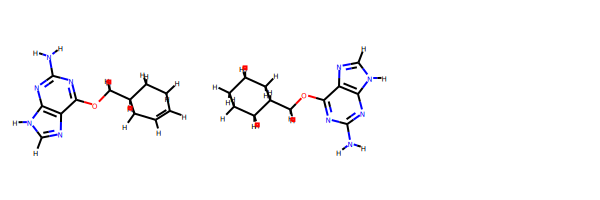

In [57]:
Draw.MolsToGridImage([mols[4],mols[3]])

In [58]:
import seaborn as sns

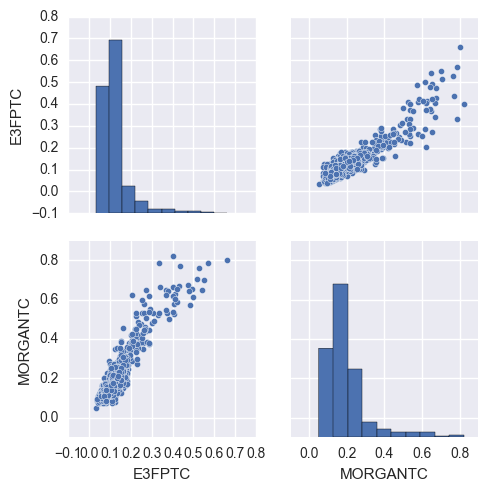

In [60]:
sns.pairplot( df )